In [83]:
import numpy as np 
import pandas as pd

In [239]:
df = pd.read_csv(r"C:\Users\vikrant k c\titanic\train.csv")

In [240]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [242]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [243]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

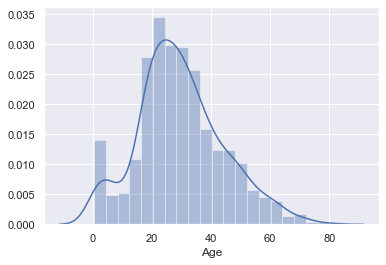

In [244]:
import seaborn as sns
sns.set(style='darkgrid')
sns.distplot(df['Age'])

In [245]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [246]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [247]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [248]:
sex_dummies = pd.get_dummies(df['Sex'],drop_first=True)

In [249]:
df = pd.concat([df,sex_dummies],axis=1)

In [250]:
df.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [251]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [252]:
feature_scale = ['Age','Fare']

In [253]:
df[feature_scale] = ss.fit_transform(df[feature_scale])

In [254]:
df.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,-0.592481,-0.502445,1
1,1,1,female,0.638789,0.786845,0
2,1,3,female,-0.284663,-0.488854,0
3,1,1,female,0.407926,0.420730,0
4,0,3,male,0.407926,-0.486337,1


In [255]:
df.drop(['Sex'],axis=1,inplace=True)

In [256]:
df

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1
...,...,...,...,...,...
886,0,2,-0.207709,-0.386671,1
887,1,1,-0.823344,-0.044381,0
888,0,3,0.000000,-0.176263,0
889,1,1,-0.284663,-0.044381,1


In [257]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# logistic regression

In [259]:
c_space = np.logspace(-5,8,15)
param_grid = {'C':c_space}
logmodel = LogisticRegression()
logreg_cv = GridSearchCV(logmodel,param_grid,cv=5)
logreg_cv.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [260]:
logreg_cv.best_params_

{'C': 3.727593720314938}

In [261]:
logreg_cv.best_score_

0.7878789780930262

# kneigbors classifier

In [262]:
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [263]:
knn_cv.best_params_

{'n_neighbors': 4}

In [264]:
knn_cv.best_score_

0.8069926558282594

# decision tree

In [265]:
param_grid = {"criterion":["gini","entropy"]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv=5)
tree_cv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [266]:
tree_cv.best_params_

{'criterion': 'gini'}

In [267]:
tree_cv.best_score_

0.7778356663109661

In [268]:
df1 = pd.read_csv(r'C:\Users\vikrant k c\titanic\test.csv')

In [269]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [270]:
df2 = df1.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1)

In [271]:
df2.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [272]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(),inplace=True)

In [273]:
sex_dummies = pd.get_dummies(df2['Sex'],drop_first=True)
df2=pd.concat([df2,sex_dummies],axis=1)
df2.drop(['Sex'],axis=1,inplace=True)

In [274]:
df2.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [275]:
df2[feature_scale]=ss.fit_transform(df2[feature_scale])

In [276]:
df2.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


In [278]:
y_pred = knn_cv.predict(df2)

In [281]:
submission = pd.DataFrame({
    "PassengerId":df1['PassengerId'],
    "Survived":y_pred
})

In [283]:
submission.to_csv('titanic_submission.csv',index=False)